# Computational Social Science Project #2 

**Enter your Name:** Miriam Dombrowski

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
# Read in the data frame
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str})

# Inspect the first few rows of the data frame
print(diabetes.head())

# Get a summary of the data frame
print(diabetes.info())

# Display basic statistics of numeric columns
print(diabetes.describe())


           County    State CountyFIPS Diabetes_Number Obesity_Number  \
0  Autauga County  Alabama      01001            5178          13489   
1  Baldwin County  Alabama      01003           16707          48542   
2  Barbour County  Alabama      01005            3400           8009   
3     Bibb County  Alabama      01007            2371           6534   
4   Blount County  Alabama      01009            6282          14227   

  Physical_Inactivity_Number  \
0                      12525   
1                      40024   
2                       5431   
3                       5827   
4                      14365   

  sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                 
1                                               86.6                                 
2                                               76.2                                 
3                             

In [3]:
print('shape: ', diabetes.shape)

shape:  (3220, 95)


In [4]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
# Look at the data types for each column in the diabetes DataFrame
print('data types:\n', diabetes.dtypes)

data types:
 County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total populatio

dtype: object


Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values

print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique())


['Suppressed']


In [6]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------


print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique())


['No Data']


In [7]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------


print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique())

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

In [8]:
"""
# Drop rows with 'Suppressed' or 'No Data' in the relevant columns
X_train = X_train[~X_train['Physical_Inactivity_Number'].isin(['Suppressed', 'No Data'])]
y_train = y_train[~X_train['Physical_Inactivity_Number'].isin(['Suppressed', 'No Data'])]


## 

# Convert 'Physical_Inactivity_Number' to numeric (float)
X_train['Physical_Inactivity_Number'] = pd.to_numeric(X_train['Physical_Inactivity_Number'], errors='coerce')

# Impute missing values (if any) with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
X_train['Physical_Inactivity_Number'] = imputer.fit_transform(X_train[['Physical_Inactivity_Number']])

# Convert to integer (if needed)
X_train['Physical_Inactivity_Number'] = X_train['Physical_Inactivity_Number'].astype('int64')

# Verify the data type
print(X_train['Physical_Inactivity_Number'].dtype)  # Should show int64 now
"""


"\n# Drop rows with 'Suppressed' or 'No Data' in the relevant columns\nX_train = X_train[~X_train['Physical_Inactivity_Number'].isin(['Suppressed', 'No Data'])]\ny_train = y_train[~X_train['Physical_Inactivity_Number'].isin(['Suppressed', 'No Data'])]\n\n\n## \n\n# Convert 'Physical_Inactivity_Number' to numeric (float)\nX_train['Physical_Inactivity_Number'] = pd.to_numeric(X_train['Physical_Inactivity_Number'], errors='coerce')\n\n# Impute missing values (if any) with mean\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean\nX_train['Physical_Inactivity_Number'] = imputer.fit_transform(X_train[['Physical_Inactivity_Number']])\n\n# Convert to integer (if needed)\nX_train['Physical_Inactivity_Number'] = X_train['Physical_Inactivity_Number'].astype('int64')\n\n# Verify the data type\nprint(X_train['Physical_Inactivity_Number'].dtype)  # Should show int64 now\n"

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [9]:
# Obesity
# ----------
# Remove rows where 'Obesity_Number' contains non-numeric values like 'No Data'
diabetes = diabetes[diabetes['Obesity_Number'] != "No Data"]

# Convert 'Obesity_Number' to numeric, coercing errors to NaN
diabetes['Obesity_Number'] = pd.to_numeric(diabetes['Obesity_Number'], errors='coerce')

# Now, convert 'Obesity_Number' to integer (using fillna to handle NaN values if necessary)
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].fillna(0).astype(int)


# Physical Inactivity
# ----------
# Remove rows where 'Physical_Inactivity_Number' contains non-numeric values like 'No Data'
diabetes = diabetes[diabetes['Physical_Inactivity_Number'] != "No Data"]

# Convert 'Physical_Inactivity_Number' to numeric, coercing errors to NaN
diabetes['Physical_Inactivity_Number'] = pd.to_numeric(diabetes['Physical_Inactivity_Number'], errors='coerce')

# Now, convert 'Physical_Inactivity_Number' to integer (using fillna to handle NaN values if necessary)
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].fillna(0).astype(int)


# Diabetes_Number
# ----------
# Remove rows where 'Diabetes_Number' contains non-numeric values like 'Suppressed' or 'No Data'
diabetes = diabetes[~diabetes['Diabetes_Number'].isin(['Suppressed', 'No Data'])]

# Convert 'Diabetes_Number' to numeric, coercing errors to NaN
diabetes['Diabetes_Number'] = pd.to_numeric(diabetes['Diabetes_Number'], errors='coerce')

# Now, convert 'Diabetes_Number' to integer (using fillna to handle NaN values if necessary)
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].fillna(0).astype(int)

# Verify the data types of all relevant columns
print(diabetes[['Obesity_Number', 'Physical_Inactivity_Number', 'Diabetes_Number']].dtypes)


# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]


# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
# diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(______)



Obesity_Number                int64
Physical_Inactivity_Number    int64
Diabetes_Number               int64
dtype: object


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [10]:
# Scale to county populations
#-----------

# Select count variables to recode to percentages; make sure we leave out ratios and our population variable
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                         'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                         'sex and age_total population_sex ratio (males per 100 females)', 
                                                         'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                         'race_total population']]

# Recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce')

# Divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [11]:
# Check
#-----------
# Set pandas options
pd.set_option('display.max_columns', None)

# Inspect recoded values
diabetes_summary = diabetes[rc_cols].describe().transpose()  # Using the columns selected in rc_cols

# Check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[:, [0, 1, 3, 7]])  # Select which columns in the summary table we want to present


,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,0.224208
Obesity_Number,3112.0,0.251666,0.088946,0.476788
Physical_Inactivity_Number,3112.0,0.200861,0.064949,0.392285
race_total population_one race,3112.0,0.976059,0.713126,1.000000
race_total population_two or more races,3112.0,0.023941,0.000000,0.286874
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000
race_total population_one race_black or african american,3112.0,0.090215,0.000000,0.874123
race_total population_one race_american indian and alaska native,3112.0,0.019398,0.000000,0.924799
race_total population_one race_american indian and alaska native_cherokee tribal grouping,3112.0,0.001791,0.000000,0.409669


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [12]:
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames


Duplicate Columns are as follows: 


['sex and age_total population_65 years and over_1',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'hispanic or latino and race_total population',
 'race_total population_one race_1',
 'race_total population_two or more races_1']

In [13]:
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames)


Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [14]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

### a. Graph 1

Graph 1 is a bar plot of obesity, physical inactivity, and diabetes rates by region. This is useful because highlighting regional differences would help to identify the optimal areas for public health interventions. Our results show that in all regions, obesity is the highest of the three variables, then physical inactivity, then diabetes. Obesity and physical inactivity are closer to one another, then there is a scomewhat steep drop-off to diabetes. 


<Figure size 720x432 with 0 Axes>

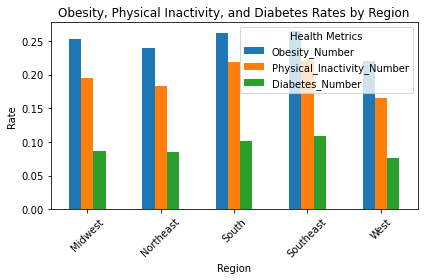

In [15]:
metrics = ['Obesity_Number', 'Physical_Inactivity_Number', 'Diabetes_Number']
region_data = diabetes[metrics + ['Region']].groupby('Region').mean()

plt.figure(figsize=(10, 6))
region_data.plot(kind='bar', stacked=False)
plt.title('Obesity, Physical Inactivity, and Diabetes Rates by Region')
plt.xlabel('Region')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Health Metrics')
plt.tight_layout()

plt.show()


### b. Graph 2

Graph 2 is a box plot of obesity, physical inactivity, and diabetes rates by region. This is useful because we can look at the distribution (spread and central tendency) of health metrics across different regions (median, quartiles, and potential outliers, which can give a better sense of the spread and central tendency of the data compared to a simple bar plot. The plot indicates that spread in the data are reletively uniform across regions between the three variables. The midwest and the northeast have the least spread, while the south and west have the nost spread. The southeast is somewhere in the middle. The range of diverse outcomes could indicate particularly large socioeconomic inequalities. 


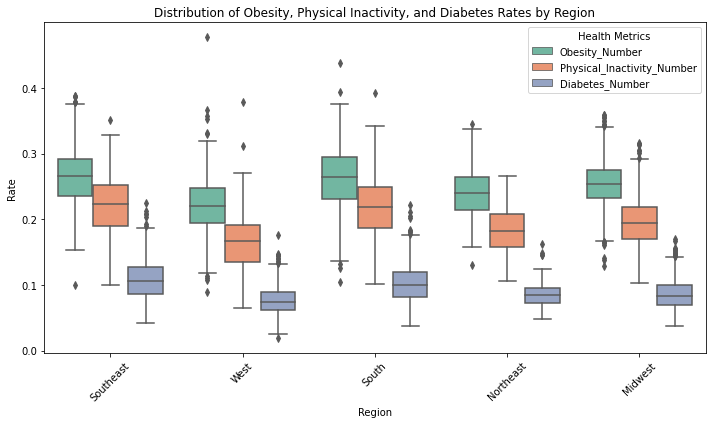

In [16]:
long_data = diabetes.melt(id_vars=['Region'], value_vars=['Obesity_Number', 'Physical_Inactivity_Number', 'Diabetes_Number'],
                          var_name='Health Metric', value_name='Rate')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Rate', hue='Health Metric', data=long_data, palette='Set2')

plt.title('Distribution of Obesity, Physical Inactivity, and Diabetes Rates by Region')
plt.xlabel('Region')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Health Metrics')
plt.tight_layout()

plt.show()


## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [17]:
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # axis=1 indicates that we want to drop columns, not rows

# look at first 10 rows of new data frame 
diabetes_clean.head(10)


,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [18]:
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe (target variable: "Diabetes_Number")
y = diabetes_clean['Diabetes_Number']

# create X dataframe (exclude target variable and any other irrelevant columns)
X = diabetes_clean.drop(columns=['Diabetes_Number', 'race_total population_one race']) # 'race_total population_one race' is excluded based on context


Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

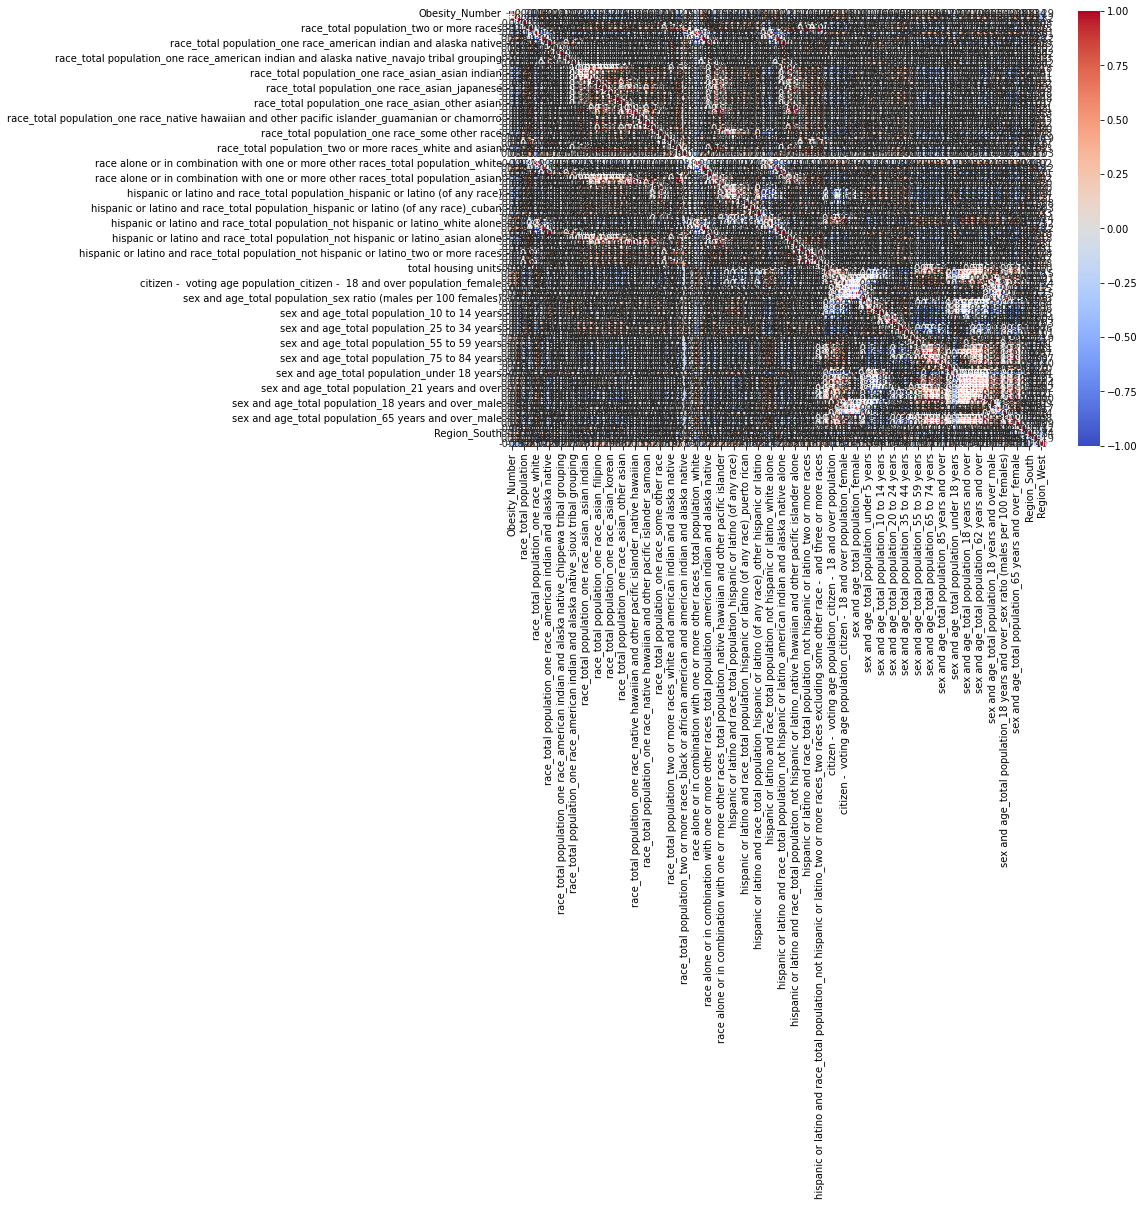

KeyError: "['highly_correlated_column_1', 'highly_correlated_column_2'] not found in axis"

In [19]:
# Feature selection
#-----------

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

X = X.drop(columns=['column_1', 'column_2'])

X = X.drop(columns=['CountyFIPS'])

X = X.drop(columns=['State', 'County'])


# 'column_1', 'column_2' from heat matrix? 


In [20]:
# Training/test split
#-----------

# set the random seed
np.random.seed(10)

# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.6,    # specify proportional split for training (60%)
                                                    test_size=0.2,     # specify proportional split for test (20%)
                                                    random_state=10)   # for reproducibility


In [21]:
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split?
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=10)  # 60% for training, 40% for validation and test

# Now split the remaining 40% into 50% for validation and 50% for test (i.e., 20% each)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=10)  # 50% of 40% = 20% for validation, 20% for test


In [22]:
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# identify non-dichotomous columns we want to transform
columns = list(X_train.select_dtypes(include=['number']).loc[:, X_train.nunique() > 2])

# use loop to fit and transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1)).flatten()


## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 

1. Linear Regression (Baseline Model)
Simple, interpretable, and provides a baseline model for understanding relationships in the data between a continuous target variable (diabetes rate) and one or more predictor variables. Linear regression assumes a linear trend, a normal distribution, and constant variance. 

2. Ridge Regression (Regularized Linear Regression)
Regularized model that helps prevent overfitting, especially useful for datasets with correlated features. Ridge regression is ideal when there are many predictor variables, and some of them might be correlated. 

3. Random Forest Regression
Ensemble model that can handle both linear and non-linear relationships and is attuned to overfitting. Builds multiple decision trees and combines their predictions to improve accuracy. However, it is less interpretable than linear models.

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  Linear Regression (Baseline Model)

In [23]:
#
# Model 1 training
#-----------

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Training R2 Score: {r2_train:.4f}")



Training Mean Squared Error (MSE): 0.0004
Training R2 Score: 0.5427


#### Model 2:  Ridge Regression (Regularized Linear Regression)

In [24]:
#
# Model 2 training
#-----------
# Import Ridge regression and evaluation metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate Ridge Regression model with a regularization parameter alpha
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to control regularization strength

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on training data
y_train_pred_ridge = ridge_model.predict(X_train)

# Predict on validation data
y_validate_pred_ridge = ridge_model.predict(X_validate)

# Evaluate the model on the training data
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

# Evaluate the model on the validation data
mse_validate_ridge = mean_squared_error(y_validate, y_validate_pred_ridge)
r2_validate_ridge = r2_score(y_validate, y_validate_pred_ridge)

# Print the results
print(f"Ridge Regression - Training MSE: {mse_train_ridge:.4f}")
print(f"Ridge Regression - Training R²: {r2_train_ridge:.4f}")
print(f"Ridge Regression - Validation MSE: {mse_validate_ridge:.4f}")
print(f"Ridge Regression - Validation R²: {r2_validate_ridge:.4f}")



Ridge Regression - Training MSE: 0.0004
Ridge Regression - Training R²: 0.5414
Ridge Regression - Validation MSE: 110555033.5295
Ridge Regression - Validation R²: -131005454393.7083


#### Model 3:  Random Forest Regression

In [25]:
#
# Model 3 training
#-----------

# Import Random Forest Regressor and evaluation metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest model with default parameters (you can tune these later)
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)  # n_estimators: number of trees

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = rf_model.predict(X_train)

# Predict on validation data
y_validate_pred_rf = rf_model.predict(X_validate)

# Evaluate the model on the training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Evaluate the model on the validation data
mse_validate_rf = mean_squared_error(y_validate, y_validate_pred_rf)
r2_validate_rf = r2_score(y_validate, y_validate_pred_rf)

# Print the results
print(f"Random Forest Regression - Training MSE: {mse_train_rf:.4f}")
print(f"Random Forest Regression - Training R²: {r2_train_rf:.4f}")
print(f"Random Forest Regression - Validation MSE: {mse_validate_rf:.4f}")
print(f"Random Forest Regression - Validation R²: {r2_validate_rf:.4f}")



Random Forest Regression - Training MSE: 0.0001
Random Forest Regression - Training R²: 0.9331
Random Forest Regression - Validation MSE: 0.0024
Random Forest Regression - Validation R²: -1.8894


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [26]:
#
# Predict on validation data
#-----------

# Assuming the linear regression model was defined as lin_reg
# Model 1: Linear Regression

y_validate_pred_lr = lr_model.predict(X_validate)
mse_validate_lr = mean_squared_error(y_validate, y_validate_pred_lr)
r2_validate_lr = r2_score(y_validate, y_validate_pred_lr)


# Model 2: Ridge Regression
y_validate_pred_ridge = ridge_model.predict(X_validate)
mse_validate_ridge = mean_squared_error(y_validate, y_validate_pred_ridge)
r2_validate_ridge = r2_score(y_validate, y_validate_pred_ridge)

# Model 3: Random Forest Regression
y_validate_pred_rf = rf_model.predict(X_validate)
mse_validate_rf = mean_squared_error(y_validate, y_validate_pred_rf)
r2_validate_rf = r2_score(y_validate, y_validate_pred_rf)

# Print the results for all models
print("Validation Set Performance:")
print(f"Linear Regression - Validation MSE: {mse_validate_lr:.4f}")
print(f"Linear Regression - Validation R²: {r2_validate_lr:.4f}")

print(f"Ridge Regression - Validation MSE: {mse_validate_ridge:.4f}")
print(f"Ridge Regression - Validation R²: {r2_validate_ridge:.4f}")

print(f"Random Forest Regression - Validation MSE: {mse_validate_rf:.4f}")
print(f"Random Forest Regression - Validation R²: {r2_validate_rf:.4f}")


Validation Set Performance:
Linear Regression - Validation MSE: 94664607.0468
Linear Regression - Validation R²: -112175623897.2186
Ridge Regression - Validation MSE: 110555033.5295
Ridge Regression - Validation R²: -131005454393.7083
Random Forest Regression - Validation MSE: 0.0024
Random Forest Regression - Validation R²: -1.8894


### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [ ]:
#
# Predict using your best model
#-----------



### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [ ]:
#
# Run cross-validation
#-----------



## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff must be considered when determining whether a model is "high performing," that is, whether it can make predictions on other datasets. The standard of quality in ML is generalizability. A model is not able to make predictions on other datasets if it either does not capture enough of the complexity in a dataset, or captures too much of the complexity. Picking up on too much of the vairance within the dataset will lead to an error called "overfitting," while too little complexity, "underfitting." Finding the correct balance along this spectrum is crucial for predicting outcomes effectively. 

2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting occurs when a model learns too much complexity within a dataset, such as noise. Overfitting is evident when the model's performance drops when its applied to other data, such as the test or validation set. Over-fitting can be addressed using cross-validation on different subsets of the data; regularization; and increasing the size of the training dataset.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

**YOUR ANSWER HERE**...